# Clustering Techniques
# 1) K-Means

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [11]:
df=pd.read_table('delivery-driver.tsv')

In [13]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [17]:
df.drop('Driver_ID',axis=1,inplace=True)

In [24]:
df.shape

(4000, 2)

In [18]:
f1=df['Distance_Feature'].values
f2=df['Speeding_Feature'].values
x=np.array(list(zip(f1,f2)))
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

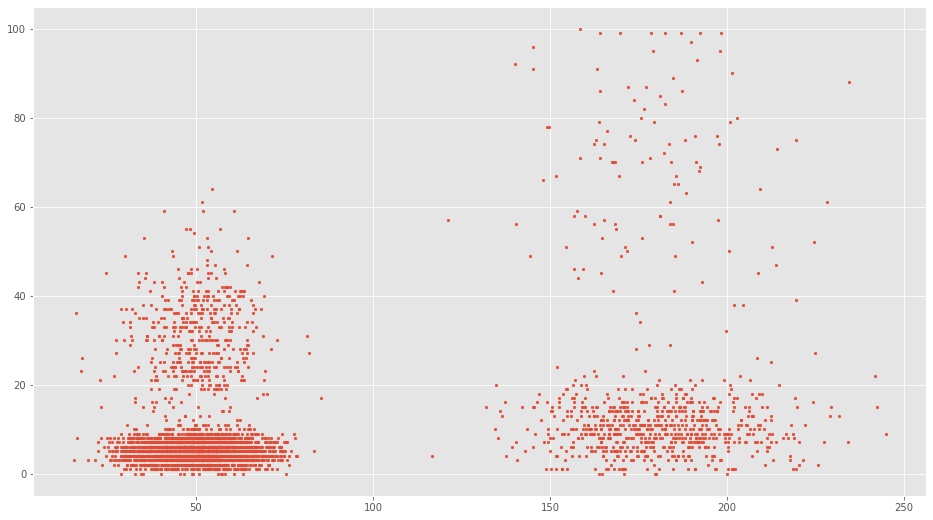

In [22]:
plt.scatter(f1,f2,s=7)

In [23]:
#Euclidean dist. calculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [44]:
k=3
C_x=np.random.randint(0,np.max(x)-50,size=k)
print(C_x)
C_y=np.random.randint(0,np.max(x)-50,size=k)
print(C_y)
C=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print('initial centroid')
print(C)

[165  83  26]
[138  11  11]
initial centroid
[[165. 138.]
 [ 83.  11.]
 [ 26.  11.]]


## Plotting along with centroid

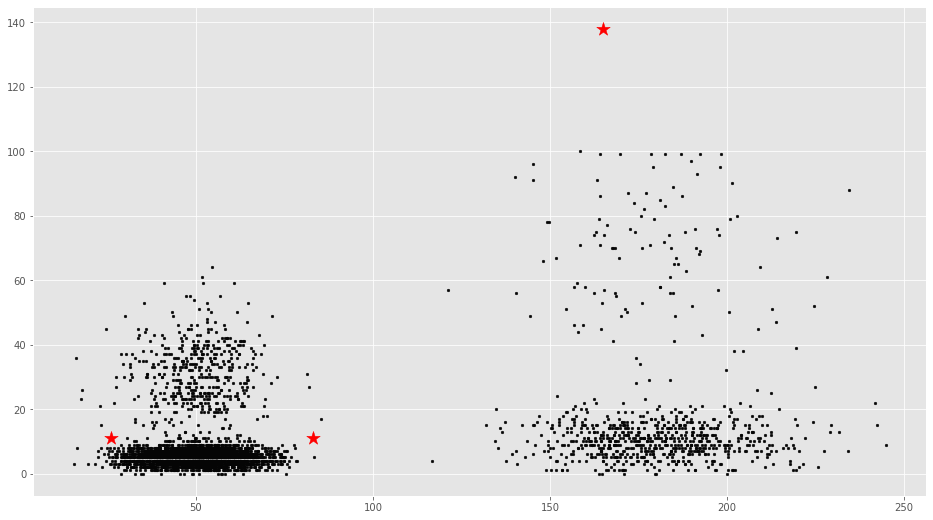

In [45]:
plt.scatter(f1,f2,c='#050505',s=7)
plt.scatter(C_x,C_y,marker='*',s=200,c='r')

In [46]:
C_old=np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [47]:
clusters=np.zeros(len(x))
clusters

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
error=dist(C,C_old,None)
error

232.54246923949182

In [49]:
clusters

array([0., 0., 0., ..., 0., 0., 0.])

## Using scikit learn

In [62]:
#### Instantiate the kmeans with required number of clusters
k_clusters = 3
kmeans     = KMeans(n_clusters=k_clusters)
kmeans

KMeans(n_clusters=3)

In [65]:
# Fitting the input data, Getting the cluster labels
y_kmeans = kmeans.fit_predict(x)
np.unique(y_kmeans)

array([0, 1, 2])

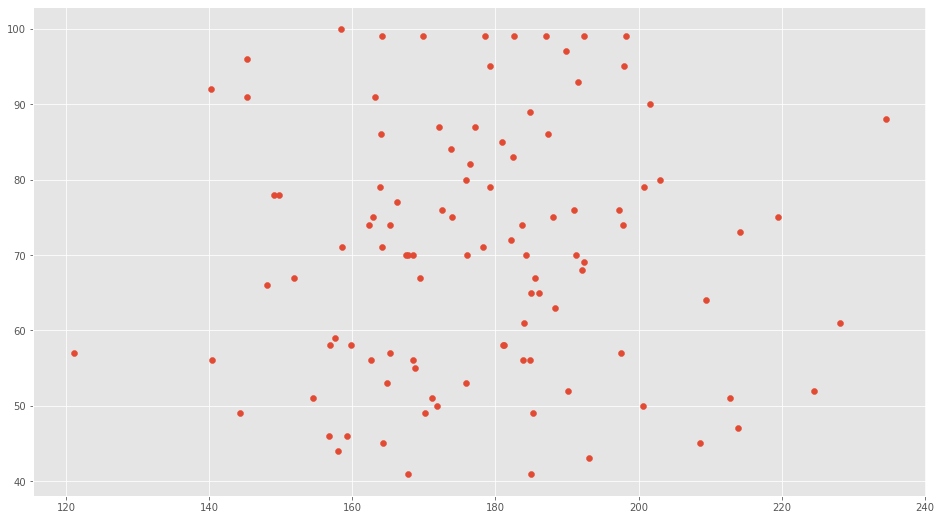

In [66]:
plt.scatter(x[y_kmeans==0, 0] ,x[y_kmeans==0, 1])

In [67]:
C

array([[165., 138.],
       [ 83.,  11.],
       [ 26.,  11.]], dtype=float32)

In [68]:
 #Centroid values
centroids = kmeans.cluster_centers_
centroids

array([[177.83509615,  70.28846154],
       [ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494]])

In [69]:
l=kmeans.labels_

In [70]:
np.unique(l)

array([0, 1, 2])

In [71]:
# Comparing with scikit-learn centroids
print("Centroid values")
print("Custom code")
print(C) 

print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
Custom code
[[165. 138.]
 [ 83.  11.]
 [ 26.  11.]]
sklearn
[[177.83509615  70.28846154]
 [ 50.04763438   8.82875   ]
 [180.34311782  10.52011494]]


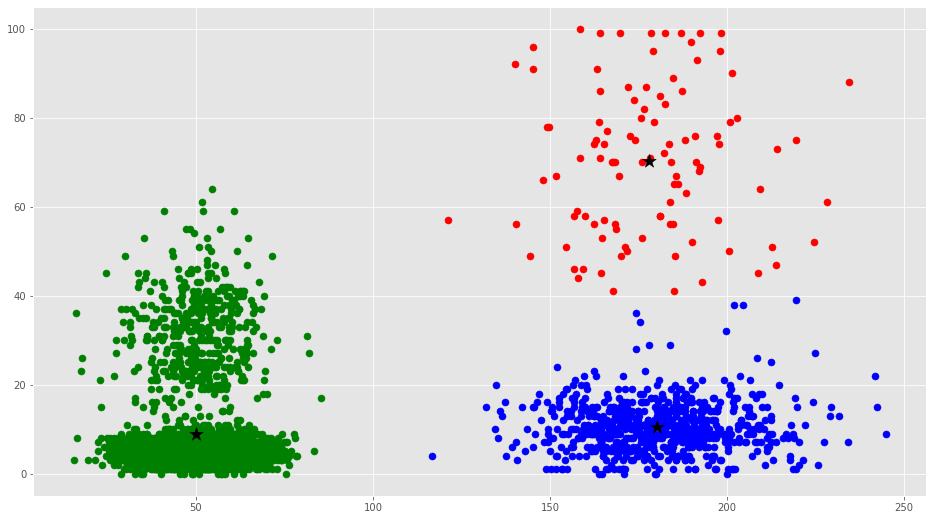

In [72]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

#fig, ax = plt.subplots()

for i in range(k_clusters):
    plt.scatter(x[y_kmeans == i, 0], 
                x[y_kmeans == i, 1], 
                s = 50, 
                c =colors[i], 
                label = 'cluster '+ str(i))

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k');


## Run K-Means on this with values 2,3,4,5 and 6

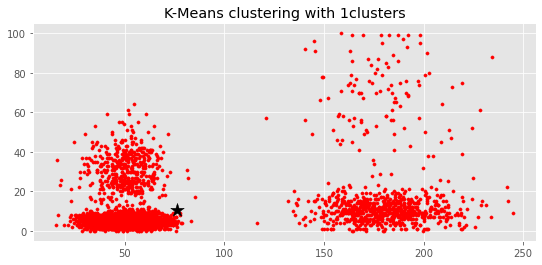

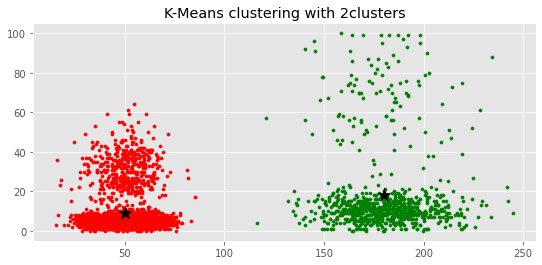

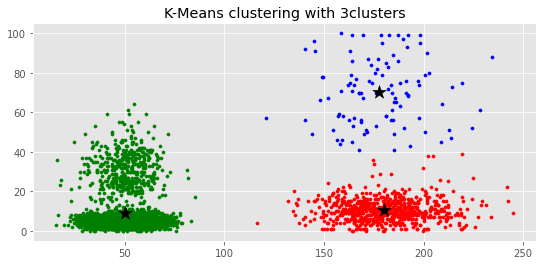

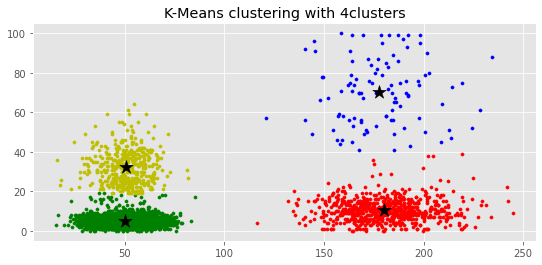

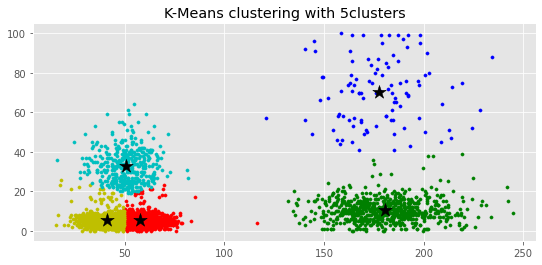

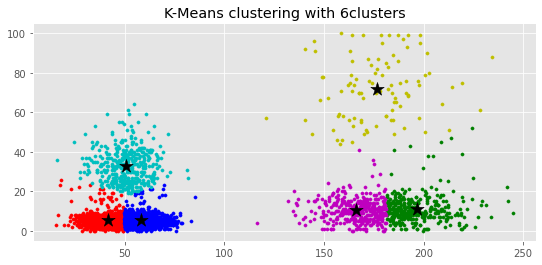

In [73]:
# Instantiate the kmeans with required number of clusters
total_no_unique_clusters = 6
for k_clusters in range(1, total_no_unique_clusters+1):
    fig = plt.figure(figsize=(9, 4)) 
    kmeans     = KMeans(n_clusters=k_clusters)
    # Fitting the input data, Getting the cluster labels
    y_kmeans = kmeans.fit_predict(x)
    # Centroid values
    centroids = kmeans.cluster_centers_
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(k_clusters):
        plt.title('K-Means clustering with '+ str(i+1)+ 'clusters')
        plt.scatter( x[y_kmeans == i, 0], 
                    x[y_kmeans == i, 1], 
                    s = 10, 
                    c =colors[i], 
                    label = 'cluster '+ str(i))
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='k');

# 2) DBSCAN

In [74]:
import time
sns.set_context('poster')
sns.set_color_codes()
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
plot_kwds={'alpha':0.25,'s':80,'linewidths':0}

In [77]:
x.T

array([[ 71.24,  52.53,  64.54, ..., 170.91, 176.14, 168.03],
       [ 28.  ,  25.  ,  27.  , ...,  12.  ,   5.  ,   9.  ]])

In [78]:
x.shape

(4000, 2)

In [79]:
x.T[1].shape

(4000,)

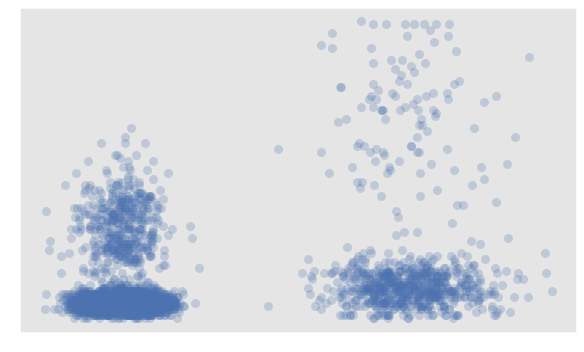

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(x.T[0],x.T[1],c='b',**plot_kwds)

frame=plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [81]:
# Testing clustering algorithms

In [85]:
cluster.DBSCAN()

DBSCAN()

[3 3 3 ... 0 0 0]


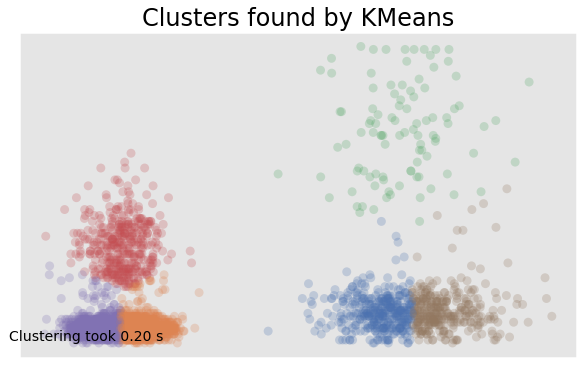

In [88]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    
    labels     = algorithm(*args, **kwds).fit_predict(data)
    
    end_time   = time.time()
    
    print(labels)
    
    plt.figure(figsize=(10,6))
    palette    = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors     = [palette[a] if a >= 0 else (0.0, 0.0, 0.0) for a in labels]
    
    plt.scatter(x.T[0], x.T[1], c=colors, **plot_kwds)
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    
plot_clusters(x, KMeans, (), {'n_clusters': 6})

# 3) Hierarchical clusters

In [89]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [109]:
merge=linkage(x,method='complete')

In [110]:
merge

array([[1.18000000e+02, 2.12000000e+02, 0.00000000e+00, 2.00000000e+00],
       [5.80000000e+01, 8.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.11000000e+02, 1.65000000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [7.98900000e+03, 7.99400000e+03, 1.25312244e+02, 6.43000000e+02],
       [7.99500000e+03, 7.99600000e+03, 1.44795869e+02, 8.00000000e+02],
       [7.99200000e+03, 7.99700000e+03, 2.34917007e+02, 4.00000000e+03]])

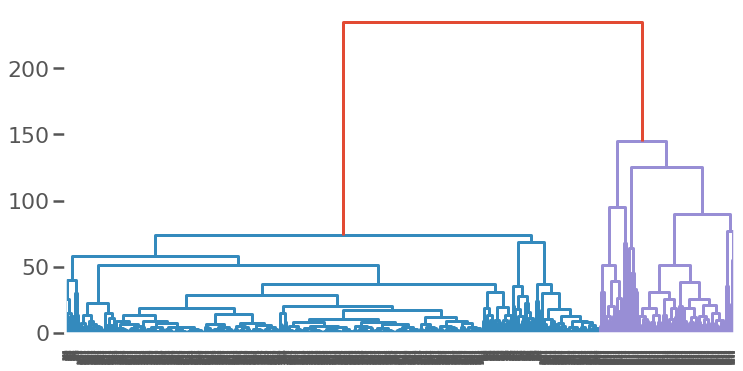

In [111]:
plt.figure(figsize=(12, 6))
dendrogram(merge,p=30,leaf_rotation=90,leaf_font_size=6,)

plt.show()